In [7]:
import pandas as pd

# Crear lista con los valores de la variable independiente (Examen 1)
df = pd.read_csv('Valhalla23.csv')

# Crear lista con los valores de la variable independiente (Examen 1)
Celsius = df['Celsius'].tolist()
print("Celsius:", Celsius)

# Crear lista con los valores de la variable dependiente (Examen 2)
Valks = df['Valks'].tolist()
print("Valks:", Valks)

# Crear lista con los hiper-parámetros iniciales (thetas)
theta0 = 1
theta1 = 1
print("Theta0:", theta0)
print("Theta1:", theta1)

# Cargar el valor del learning rate (alpha)
alpha = 0.0005
print("Alpha:", alpha)


Celsius: [61.472, 70.579, -7.3013, 71.338, 43.236, -10.246, 7.8498, 34.688, 75.751, 76.489, -4.2387, 77.059, 75.717, 28.538, 60.028, -5.8114, 22.176, 71.574, 59.221, 75.949, 45.574, -16.429, 64.913, 73.399, 47.874, 55.774, 54.313, 19.223, 45.548, -2.8813, 50.605, -16.817, 7.6923, -15.383, -10.287, 62.346, 49.483, 11.71, 75.022, -16.555, 23.874, 18.156, 56.552, 59.52, -1.3127, 28.976, 24.559, 44.631, 50.936, 55.469, 7.6025, 47.97, 45.51, -3.7388, -8.1002, 29.836, 75.974, 14.039, 38.527, 2.3812, 55.127, 5.5095, 30.596, 49.908, 69.09, 75.929, 34.722, -6.1376, -5.0706, 5.7508, 64.072, 5.4282, 61.428, 4.3525, 72.926, 14.998, -0.34047, 5.1084, 41.604, 27.329, 15.166, 63.083, 38.526, 34.972, 71.719, 8.5839, 55.72, 55.373, 18.045, 36.782, -12.415, -14.605, 33.08, 57.917, 73.401, -7.0094, 36.882, 26.939, -18.81, 13.712]
Valks: [-139.74, -156.6, 73.269, -165.42, -75.835, 83.437, 24.68, -55.108, -182.82, -183.46, 61.973, -171.99, -175.83, -30.998, -142.49, 66.37, -12.882, -150.58, -117.99, -174.9

In [8]:
# Crear función lambda para la función de hipótesis

h0 = lambda theta0, theta1, x : theta0 + theta1 * x

# Calcular el total de muestras a partir de los datos (n)
n = len(Celsius)


In [9]:
# Calcular delta para theta0 y para cada muestra

delta = [h0(theta0, theta1, Celsius[i]) - Valks[i] for i in range(len(Celsius))]
print(delta)

# Calcular delta para theta1 y para cada muestra
deltax = [delta[i] * Celsius[i] for i in range(len(Celsius)) ]
print(deltax)

# Calcular sumatorias y promedio

sumdelta = sum(delta)
sumdeltax = sum(deltax)
print(sumdelta)
print(sumdeltax)

[202.21200000000002, 228.17899999999997, -79.5703, 237.75799999999998, 120.071, -92.68299999999999, -15.8302, 90.79599999999999, 259.571, 260.949, -65.2117, 250.049, 252.54700000000003, 60.536, 203.518, -71.18140000000001, 36.058, 223.154, 178.21099999999998, 251.86899999999997, 128.131, -118.889, 207.933, 230.719, 154.124, 190.154, 166.263, 23.4059, 126.58, -60.3673, 156.305, -113.868, -17.7557, -112.481, -88.43, 186.076, 142.895, -3.433, 247.67200000000003, -115.299, 40.56, 21.036099999999998, 187.422, 172.27, -54.5887, 70.91, 49.067, 131.628, 146.716, 171.50900000000001, -16.4775, 144.228, 133.617, -63.352799999999995, -81.3472, 72.566, 263.064, 6.2745999999999995, 102.043, -38.7778, 156.217, -25.6885, 80.97, 159.498, 210.73, 243.869, 86.457, -74.21260000000001, -68.1766, -25.233200000000004, 192.172, -26.786800000000003, 196.498, -30.8615, 252.11599999999999, 14.626199999999999, -50.44147, -29.0746, 122.379, 55.361000000000004, 7.392000000000001, 212.573, 105.106, 90.468, 255.289, 

In [10]:
# Actualizar theta0
theta0 = theta0 - alpha * sumdelta/n
print(theta0)

# Actualizar theta1
theta1 = theta1 - alpha * sumdeltax/n
print(theta1)

estimaciones = [h0(theta0, theta1, x) for x in Celsius]

# Crear un DataFrame de pandas para mostrar los resultados en una tabla
tabla = pd.DataFrame({'Celsius': Celsius, 'Valks Estimado': estimaciones})
print(tabla)

0.95909075735
-2.078109549166206
    Celsius  Valks Estimado
0   61.4720     -126.786459
1   70.5790     -145.711803
2   -7.3013       16.131992
3   71.3380     -147.289088
4   43.2360      -88.890054
..      ...             ...
95  -7.0094       15.525392
96  36.8820      -75.685746
97  26.9390      -55.023102
98 -18.8100       40.048331
99  13.7120      -27.535947

[100 rows x 2 columns]


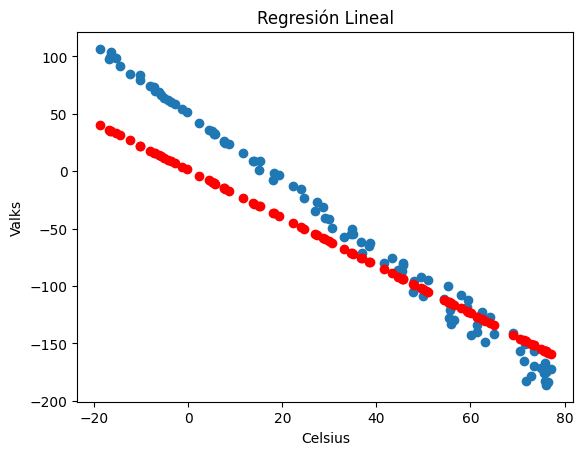

In [11]:
import matplotlib.pyplot as plt
plt.scatter(Celsius, Valks)
plt.scatter(Celsius, [h0(theta0, theta1, x) for x in Celsius], color='red')
plt.xlabel('Celsius')
plt.ylabel('Valks')
plt.title('Regresión Lineal')
plt.show()

100 ITERACIONES

Celsius: [61.472, 70.579, -7.3013, 71.338, 43.236, -10.246, 7.8498, 34.688, 75.751, 76.489, -4.2387, 77.059, 75.717, 28.538, 60.028, -5.8114, 22.176, 71.574, 59.221, 75.949, 45.574, -16.429, 64.913, 73.399, 47.874, 55.774, 54.313, 19.223, 45.548, -2.8813, 50.605, -16.817, 7.6923, -15.383, -10.287, 62.346, 49.483, 11.71, 75.022, -16.555, 23.874, 18.156, 56.552, 59.52, -1.3127, 28.976, 24.559, 44.631, 50.936, 55.469, 7.6025, 47.97, 45.51, -3.7388, -8.1002, 29.836, 75.974, 14.039, 38.527, 2.3812, 55.127, 5.5095, 30.596, 49.908, 69.09, 75.929, 34.722, -6.1376, -5.0706, 5.7508, 64.072, 5.4282, 61.428, 4.3525, 72.926, 14.998, -0.34047, 5.1084, 41.604, 27.329, 15.166, 63.083, 38.526, 34.972, 71.719, 8.5839, 55.72, 55.373, 18.045, 36.782, -12.415, -14.605, 33.08, 57.917, 73.401, -7.0094, 36.882, 26.939, -18.81, 13.712]
Valks: [-139.74, -156.6, 73.269, -165.42, -75.835, 83.437, 24.68, -55.108, -182.82, -183.46, 61.973, -171.99, -175.83, -30.998, -142.49, 66.37, -12.882, -150.58, -117.99, -174.9

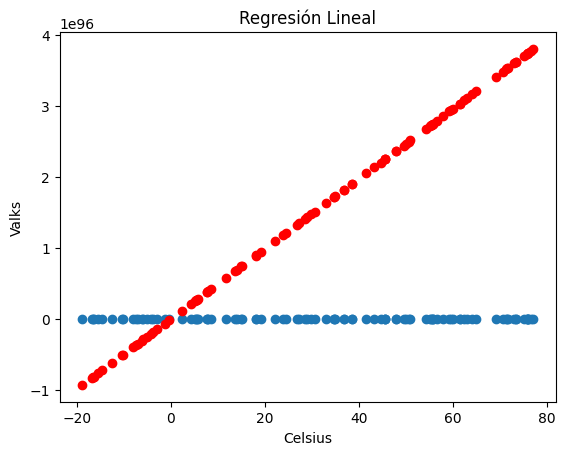

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear lista con los valores de la variable independiente (Examen 1)
df = pd.read_csv('Valhalla23.csv')

# Crear lista con los valores de la variable independiente (Examen 1)
Celsius = df['Celsius'].tolist()
print("Celsius:", Celsius)

# Crear lista con los valores de la variable dependiente (Examen 2)
Valks = df['Valks'].tolist()
print("Valks:", Valks)

# Crear lista con los hiper-parámetros iniciales (thetas)
theta0 = 1
theta1 = 1
print("Theta0:", theta0)
print("Theta1:", theta1)

# Cargar el valor del learning rate (alpha)
alpha = 0.005
print("Alpha:", alpha)

# Crear función lambda para la función de hipótesis

h0 = lambda theta0, theta1, x : theta0 + theta1 * x

# Calcular el total de muestras a partir de los datos (n)
n = len(Celsius)

# 100 ITERACIONES
for i in range(100):
  # Calcular delta para theta0 y para cada muestra
  delta = [h0(theta0, theta1, Celsius[i]) - Valks[i] for i in range(len(Celsius))]
  # Calcular delta para theta1 y para cada muestra
  deltax = [delta[i] * Celsius[i] for i in range(len(Celsius)) ]
  # Calcular sumatorias
  sumdelta = sum(delta)
  sumdeltax = sum(deltax)
  # Actualizar theta0
  theta0 = theta0 - alpha * sumdelta/n
  # Actualizar theta1
  theta1 = theta1 - alpha * sumdeltax/n

print("Theta0 final:", theta0)
print("Theta1 final:", theta1)
print(h0(theta0, theta1, 61.47200))
estimaciones = [h0(theta0, theta1, x) for x in Celsius]

# Crear un DataFrame de pandas para mostrar los resultados en una tabla
tabla = pd.DataFrame({'Celsius': Celsius, 'Valks Estimado': estimaciones})
print(tabla)

plt.scatter(Celsius, Valks)
plt.scatter(Celsius, [h0(theta0, theta1, x) for x in Celsius], color='red')
plt.xlabel('Celsius')
plt.ylabel('Valks')
plt.title('Regresión Lineal')
plt.show()


Prueba tu implementación.
Usando Traininig.cvs (60 datos) para predecir los resultados de test.cvs
(40 datos)

Yo seleccione los valores de alpha y datos de manera arbitraria


Theta0: 44.519622211687384
Theta1: -2.884562177380718
     Celsius  Valks Real  Valks Estimado
0    2.38120     42.1590       37.650903
1   55.12700   -100.0900     -114.497637
2    5.50950     32.1980       28.627127
3   30.59600    -49.3740      -43.736442
4   49.90800   -108.5900      -99.443107
5   69.09000   -140.6400     -154.774779
6   75.92900   -166.9400     -174.502299
7   34.72200    -50.7350      -55.638146
8   -6.13760     69.0750       62.223911
9   -5.07060     64.1060       59.146083
10   5.75080     31.9840       27.931082
11  64.07200   -127.1000     -140.300046
12   5.42820     33.2150       28.861642
13  61.42800   -134.0700     -132.673263
14   4.35250     36.2140       31.964565
15  72.92600   -178.1900     -165.839959
16  14.99800      1.3718        1.256959
17  -0.34047     51.1010       45.501729
18   5.10840     35.1830       29.784125
19  41.60400    -79.7750      -75.489703
20  27.32900    -27.0320      -34.312578
21  15.16600      8.7740        0.772352
22 

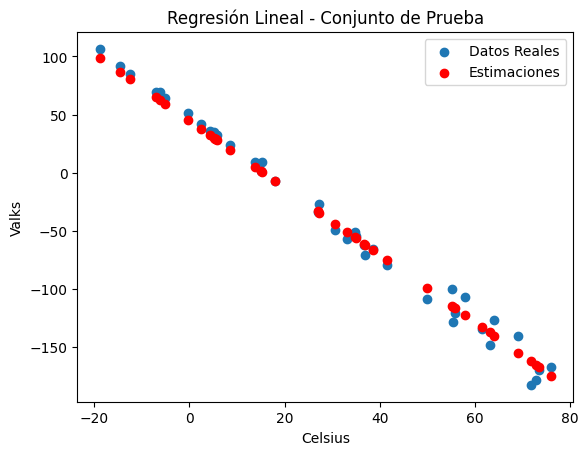

Costo en el conjunto de entrenamiento: 25.976834257305747
Costo en el conjunto de prueba: 30.88295587243797


In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos de entrenamiento
df_train = pd.read_csv('Training.csv')

# Datos de entrenamiientto
Celsius_train = df_train['Celsius'].tolist()
Valks_train = df_train['Valks'].tolist()

# Cargar los datos de prueba
df_test = pd.read_csv('test.csv')

# Datos de prueba
Celsius_test = df_test['Celsius'].tolist()
Valks_test = df_test['Valks'].tolist()

# theta inicial
theta0 = 1
theta1 = 1

# Alpha
alpha = 0.0005

# Definir la función de hipótesis
h0 = lambda theta0, theta1, x : theta0 + theta1 * x

# Número n
n_train = len(Celsius_train)

# Gradiente descendente
for i in range(10000):
    delta = [h0(theta0, theta1, Celsius_train[i]) - Valks_train[i] for i in range(n_train)]
    deltax = [delta[i] * Celsius_train[i] for i in range(n_train)]
    sumdelta = sum(delta)
    sumdeltax = sum(deltax)
    theta0 = theta0 - alpha * sumdelta/n_train
    theta1 = theta1 - alpha * sumdeltax/n_train

# Mostrar los parámetros finales
print("Theta0:", theta0)
print("Theta1:", theta1)

# Resultados de prueba
estimaciones_test = [h0(theta0, theta1, x) for x in Celsius_test]

# Todos los resultados
tabla_test = pd.DataFrame({'Celsius': Celsius_test, 'Valks Real': Valks_test, 'Valks Estimado': estimaciones_test})
print(tabla_test)

# Graficar los datos de prueba y la línea de regresión
plt.scatter(Celsius_test, Valks_test, label='Datos Reales')
plt.scatter(Celsius_test, estimaciones_test, color='red', label='Estimaciones')
plt.xlabel('Celsius')
plt.ylabel('Valks')
plt.title('Regresión Lineal - Conjunto de Prueba')
plt.legend()
plt.show()

# Costo para el conjunto de entrenamiento
costo_train = sum([(h0(theta0, theta1, Celsius_train[i]) - Valks_train[i])**2 for i in range(n_train)]) / (2 * n_train)
print("Costo en el conjunto de entrenamiento:", costo_train)

# Costo para el conjunto de prueba
n_test = len(Celsius_test)
costo_test = sum([(h0(theta0, theta1, Celsius_test[i]) - Valks_test[i])**2 for i in range(n_test)]) / (2 * n_test)
print("Costo en el conjunto de prueba:", costo_test)


descarga del archivo a pdf


In [27]:
import os

# Montar el drive
from google.colab import drive
drive.mount('/content/drive')
# Listar archivos en el directorio MyDrive/7_Semestre
os.listdir('/content/drive/MyDrive/7_Semestre')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['1. Para empezar.gdoc',
 '2. La variable continua: Unos problemillas.gdoc',
 'Módulo2.html',
 'Módulo2.gdoc',
 'Módulo2.ipynb',
 'ScikitLearnTemplate.ipynb',
 'Scikit-learn.html',
 'Scikit-learn.ipynb',
 'Scikit-learn.gdoc',
 'Momento de Retroalimentación: Reto Limpieza del Conjunto de Datos.gdoc']

In [28]:
!jupyter nbconvert --to html "/content/drive/MyDrive/7_Semestre/Módulo2.ipynb"


[NbConvertApp] Converting notebook /content/drive/MyDrive/7_Semestre/Módulo2.ipynb to html
[NbConvertApp] Writing 729463 bytes to /content/drive/MyDrive/7_Semestre/Módulo2.html
